## Diskretna Furijeova transformacija 
<img src='fourier_transform.png'> 

NumPy biblioteka nudi podrsku za rad sa Furijeovim transformacijama kroz paket fft.  

Slicne funkcionalnosti u radu sa Furijeovim transformacijama nudi i SciPy biblioteka kroz fftpack paket. U pitanju je API ka nativnim Fortran implementacijama koje se već dugo vremena koriste i unapređuju. 

In [51]:
from numpy import fft
from scipy import signal 

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# signal se sastoji iz sinusoida sa frekvencijama 1 i 22 i suma sa Gausovom raspodelom
def test_signal(t):
    return 2*np.sin(2*np.pi*t) + 3*np.sin(22*2*np.pi*t) + 2*np.random.randn(np.shape(t)[0])

In [53]:
# uslovi koji se odnose na uzorkovanje (eng. sampling):
# potrebno je pokriti frekvencije do 30Hz 
# obezbediti rezoluciju 0.01Hz frekvencijskog spektra 
# 
# zbog Najkvistove teoreme frekvencija uzorkovanja treba da bude 2*30=60Hz 
# rezolucija frekvencijskog spektra je rastojanje izmedju dveju uzastopnih frekvencija
# pa zakljucujemo da nam treba 60/0.01 = 6000 uzoraka 
# period uzorkovanja treba da bude 6000/60 = 100 sekundi 

t = np.linspace(0, 100, 6000, endpoint = True)

In [54]:
# vrednosti signala
f = test_signal(t)

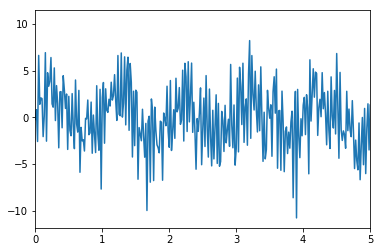

In [55]:
# iscrtavamo grafik na malom delu vremena zbog velikih frekvencija
plt.xlim(0, 5)
plt.plot(t, f)

In [56]:
# funkcija fft izracunava koeficijente Furijeove transformacije
c = fft.fft(f)

In [57]:
# koeficijenti koji se dobijaju su kompleksni brojevi
type(c), c.shape, c.dtype

(numpy.ndarray, (6000,), dtype('complex128'))

In [58]:
# za koeficijente vazi uredjenje
# c[0] - zero-frequency clan 
# c[1], ...., c[n/2] - positive frequency clanovi 
# c[n/2+1], ...., c[n-1] - negative frequency clanovi 
c

array([ -93.69021409  +0.j        ,  -28.18485012 -43.90265976j,
         -5.65404574 -56.08440823j, ...,  149.01254131-107.18427157j,
         -5.65404574 +56.08440823j,  -28.18485012 +43.90265976j])

In [59]:
# moduo koeficijenta odgovara amplitudi sinusoide frekvencijskog spektra
# argument koeficijenta odgovara faznom pomeraju sinusoide frekvencijskog spektra

In [60]:
# frekvencije koje odgovaraju frekvencijama spektra
freq = fft.fftfreq(6000, 1.0/60)

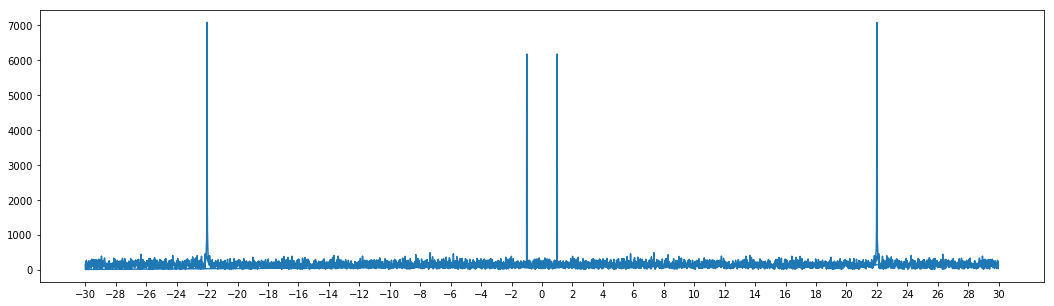

In [61]:
# prikaz odgovarajuceg frekvencijskog spektra
# pikovi koji odgovaraju vrednostima 1 i 22 su frekvencije sastupljene u test signalu
plt.figure(figsize=(18, 5))
plt.xticks(np.linspace(-30, 30, 31))
plt.plot(freq, np.abs(c))

<Container object of 3 artists>

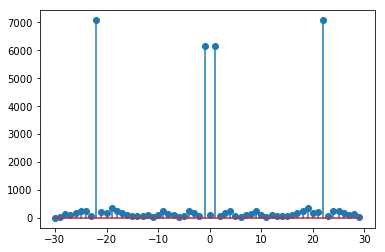

In [62]:
# praksa je da se frekvencije iscrtavaju na posebnim tzv. stem graficima
plt.stem(freq[::100], np.abs(c)[::100])

<Container object of 3 artists>

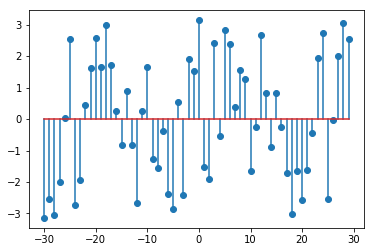

In [63]:
# isto vazi i za iscrtavanje faza
plt.stem(freq[::100], np.angle(c)[::100])

In [64]:
# ukoliko zelimo da eliminisemo frekvencije npr. cije su amplitude manje od 2 (eliminisemo sum)
# mozemo da napravimo filter
c_filtered = c * (np.abs(freq)<2) 

In [65]:
# primenjujemo inverznu Furijeovu transformaciju i vracamo se u vremenski spektar
f_filtered = fft.ifft(c_filtered)

In [66]:
# ovako dobijene vrednosti su kompleksni brojevi 
# polazna funkcija je realna funkcija pa ignorisemo kompleksni deo
f_filtered

array([ 0.03977825 +1.15344771e-15j,  0.34002371 +1.29259566e-15j,
        0.63974584 +5.60144523e-16j, ..., -0.81252693 +1.16001490e-15j,
       -0.54148883 +1.14686393e-15j, -0.25576358 +8.94982374e-16j])

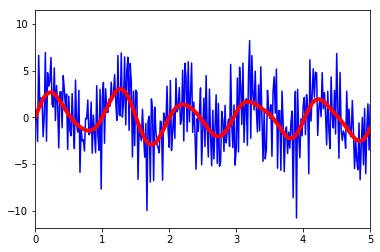

In [67]:
# crtamo polaznu funkciju i funkciju koja je dobijana eliminacijom odredjenih frekvencija
plt.xlim(0, 5)
plt.plot(t, f, 'b-')
plt.plot(t, f_filtered.real, 'r-', lw=4)

In [68]:
# kreiramo ekvivalentni konvolucioni filter zasnovan na principu dualnosti (real-time filter)

In [69]:
H = np.abs(freq)<2

In [70]:
h = fft.ifftshift(fft.ifft(H))

In [71]:
f_conv_filtered = signal.convolve(f, h, mode='same')

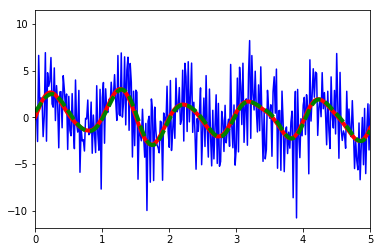

In [72]:
# vrednosti koje se dobijaju konvolucionim filterom su prikazane zelenom bojom
plt.xlim(0, 5)
plt.plot(t, f, 'b-')
plt.plot(t, f_filtered, 'r-', lw=4)
plt.plot(t, f_conv_filtered, 'g--', lw=4)
